In [49]:
# Mounting the drive
# https://www.tensorflow.org/tutorials/quickstart/beginner
# Kenny Rosas-Mondragon
# G17
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
train = "/content/gdrive/My Drive/Datasets/train.csv"
no_stonks = pd.read_csv('/content/gdrive/My Drive/Datasets/no_profit.csv')
ye_stonks = pd.read_csv('/content/gdrive/My Drive/Datasets/profit_only.csv')
data = pd.read_csv(train)

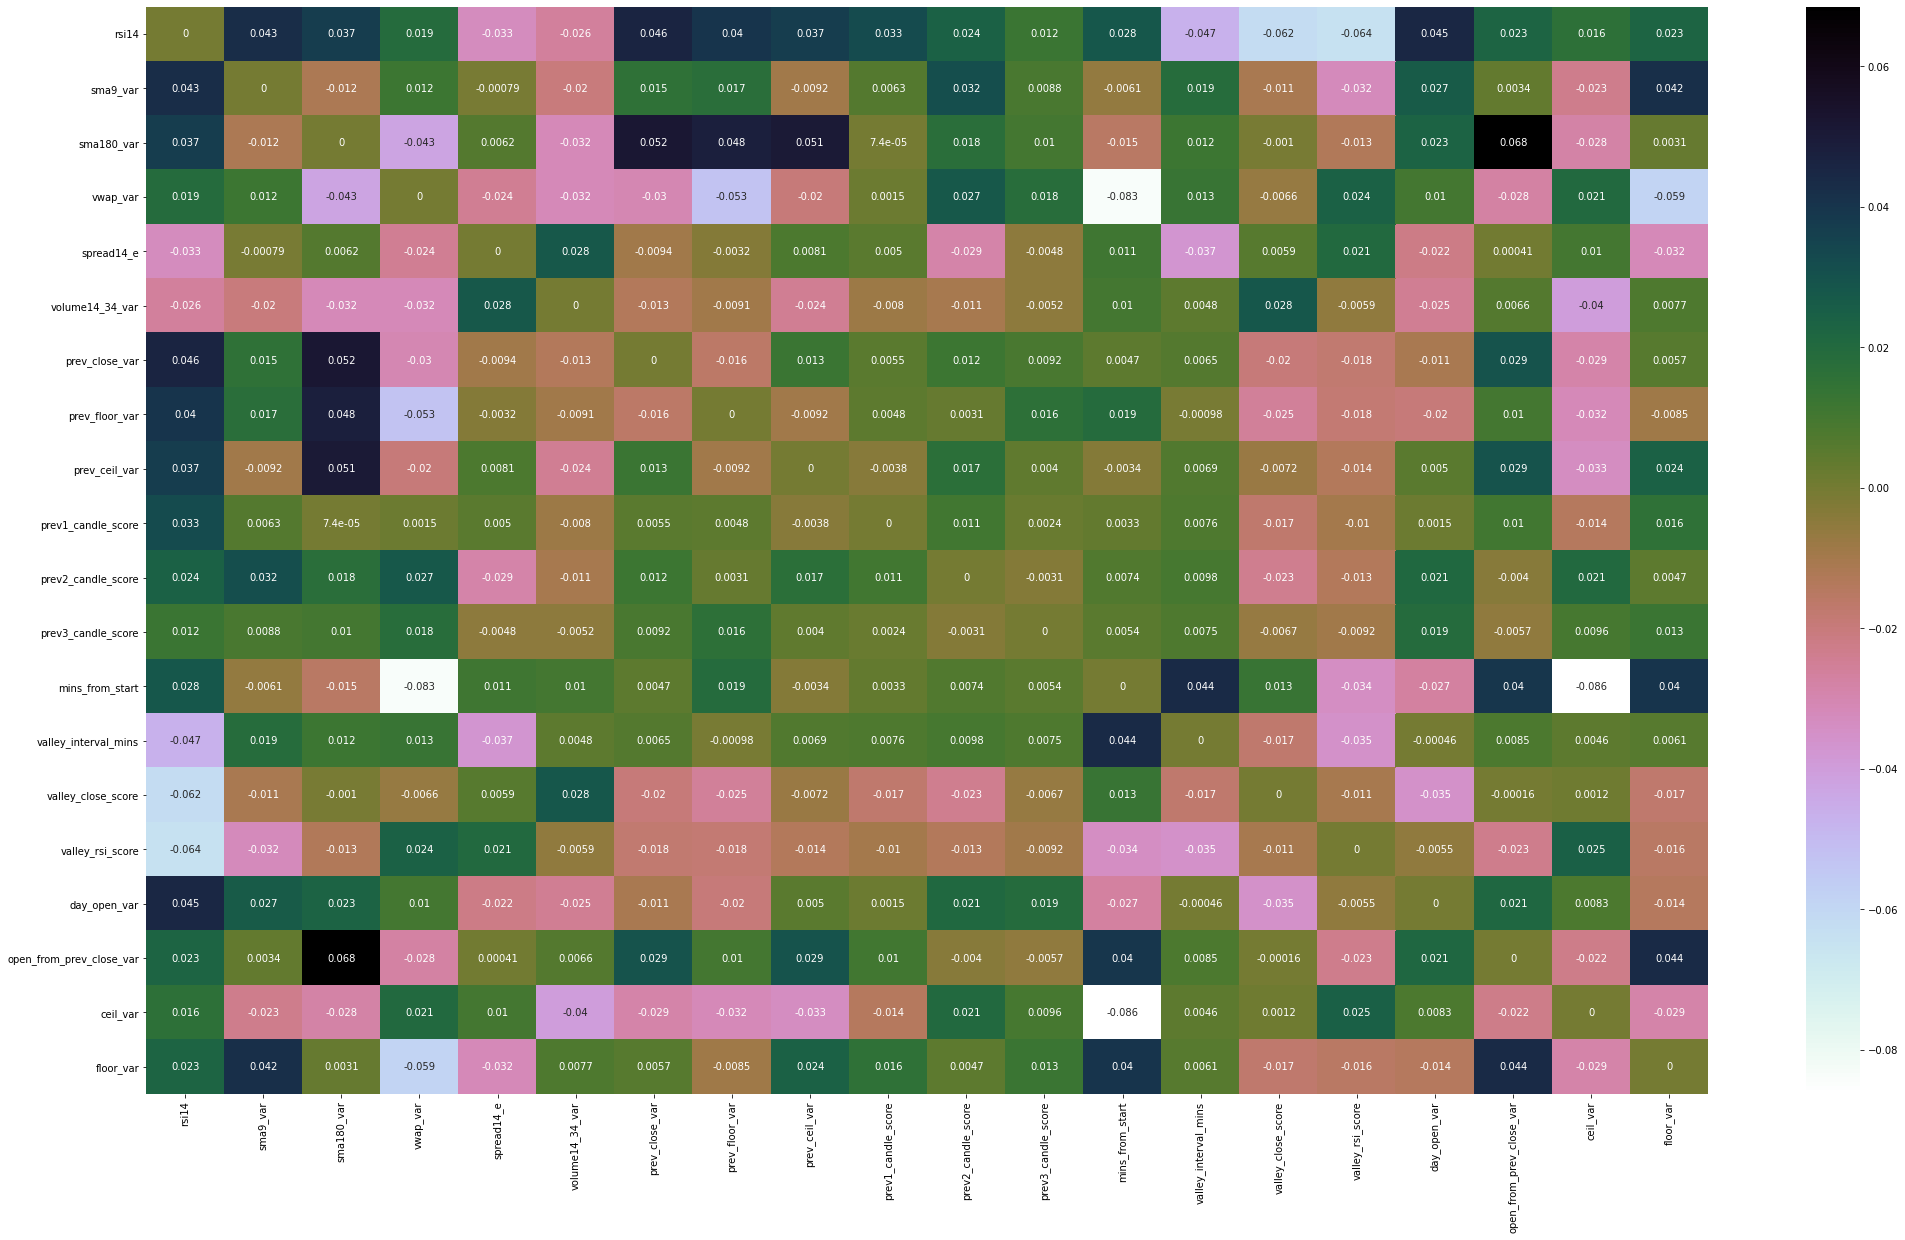

In [34]:
plt.figure(figsize=(35,20))
diff = (ye_stonks.corr() - no_stonks.corr())
sns.heatmap(diff, annot=True, cmap='cubehelix_r')
plt.show()

In [37]:
stonks_mod = data[(data.rsi14 != 0) & (data.sma9_var != 0) & (data.sma180_var != 0) & (data.vwap_var != 0)]
print(stonks_mod.shape)

feature_names = ['rsi14','sma9_var', 'vwap_var', 'volume14_34_var']
x = stonks_mod[feature_names]
y = stonks_mod.is_profit

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = stonks_mod.is_profit, random_state=0)
x_train

(258727, 23)


,rsi14,sma9_var,vwap_var,volume14_34_var
44312,36.392388,-0.002317,-0.007385,-0.695408
40013,28.852534,-0.004323,-0.027300,0.152329
79657,43.797063,-0.001527,-0.024224,-0.170790
106429,43.009396,-0.000838,-0.004666,-0.330267
27255,38.673942,-0.001690,-0.002561,-0.366051
...,...,...,...,...
119557,28.767631,-0.005590,-0.010231,-0.689708
29231,34.963174,-0.001805,-0.004558,0.003894
153848,32.358901,-0.002045,-0.011724,0.319989
80801,30.036235,-0.001412,-0.011247,-0.511347


In [38]:
net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim=4, activation=tf.nn.relu),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10)])

In [39]:
predictions = net(np.array(x_train)[:1]).numpy()
predictions

array([[ 0.07611346,  3.6450045 , -5.1951847 ,  1.422064  ,  0.28253075,
        -4.9532547 , -0.5931099 ,  2.735428  ,  1.8646462 , -2.1671433 ]],
      dtype=float32)

In [18]:
tf.nn.softmax(predictions).numpy()

array([[1.9270200e-02, 5.5488330e-05, 1.6396378e-01, 5.3685363e-03,
        5.0521372e-03, 1.8491926e-02, 4.3667001e-01, 1.5756391e-01,
        7.8519613e-02, 1.1504442e-01]], dtype=float32)

In [40]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [41]:
loss_fn(y_train[:1], predictions).numpy()

0.56540143

In [42]:
net.compile(loss=loss_fn, metrics=['accuracy'])

In [43]:
net.fit(x_train, y_train, epochs=15) # Fit Model

Epoch 1/15
6064/6064 [==============================] - 10s 2ms/step - loss: 0.7675 - accuracy: 0.5938
Epoch 2/15
6064/6064 [==============================] - 9s 1ms/step - loss: 0.6412 - accuracy: 0.6485
Epoch 3/15
6064/6064 [==============================] - 9s 1ms/step - loss: 0.6308 - accuracy: 0.6584
Epoch 4/15
6064/6064 [==============================] - 9s 1ms/step - loss: 0.6289 - accuracy: 0.6585
Epoch 5/15
6064/6064 [==============================] - 9s 1ms/step - loss: 0.6262 - accuracy: 0.6635
Epoch 6/15
6064/6064 [==============================] - 9s 1ms/step - loss: 0.6240 - accuracy: 0.6652
Epoch 7/15
6064/6064 [==============================] - 9s 1ms/step - loss: 0.6224 - accuracy: 0.6674
Epoch 8/15
6064/6064 [==============================] - 9s 1ms/step - loss: 0.6216 - accuracy: 0.6658
Epoch 9/15
6064/6064 [==============================] - 9s 1ms/step - loss: 0.6193 - accuracy: 0.6695
Epoch 10/15
6064/6064 [==============================] - 9s 1ms/step - loss: 0.61

In [44]:
net.evaluate(x_test,  y_test, verbose=2) # Eval accuracy...

2022/2022 - 2s - loss: 0.6121 - accuracy: 0.6709


[0.6120834946632385, 0.6708821654319763]